In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv(
    "/Users/gabrielmancillas/Documents/GitHub/Customer-shopping-trends/shopping_trends.csv"
)

/var/folders/jw/4t4swxld5c5f_5xhv0_bzbr00000gn/T/ipykernel_29322/3051982632.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
%pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install os

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [6]:
%pip install seaborn



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install nbformat



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install nbformat


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Python
import pandas as pd
import plotly.express as px

# Assuming 'df' is your DataFrame and it has columns 'Item Purchased', 'Gender' and 'Review Rating'
avg_ratings = (
    df.groupby(["Item Purchased", "Gender"])["Review Rating"].mean().reset_index()
)

fig = px.area(
    avg_ratings,
    x="Item Purchased",
    y="Review Rating",
    color="Gender",
    title="Average Review Rating by Item Purchased and Gender",
    facet_col="Gender",
    facet_col_wrap=1,
)

fig.update_layout(
    xaxis_title="Item Purchased",
    yaxis_title="Average Review Rating",
    legend_title="Gender",
    xaxis={"categoryorder": "total descending"},
)

fig.show()

In [10]:
%pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
# Python
import plotly.express as px

fig = px.box(
    df,
    x="Item Purchased",
    y="Review Rating",
    color="age",
    title="Boxplot of Review Rating by Item Purchased",
)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
total_purchase_by_category = df.groupby("Category")["Purchase Amount (USD)"].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


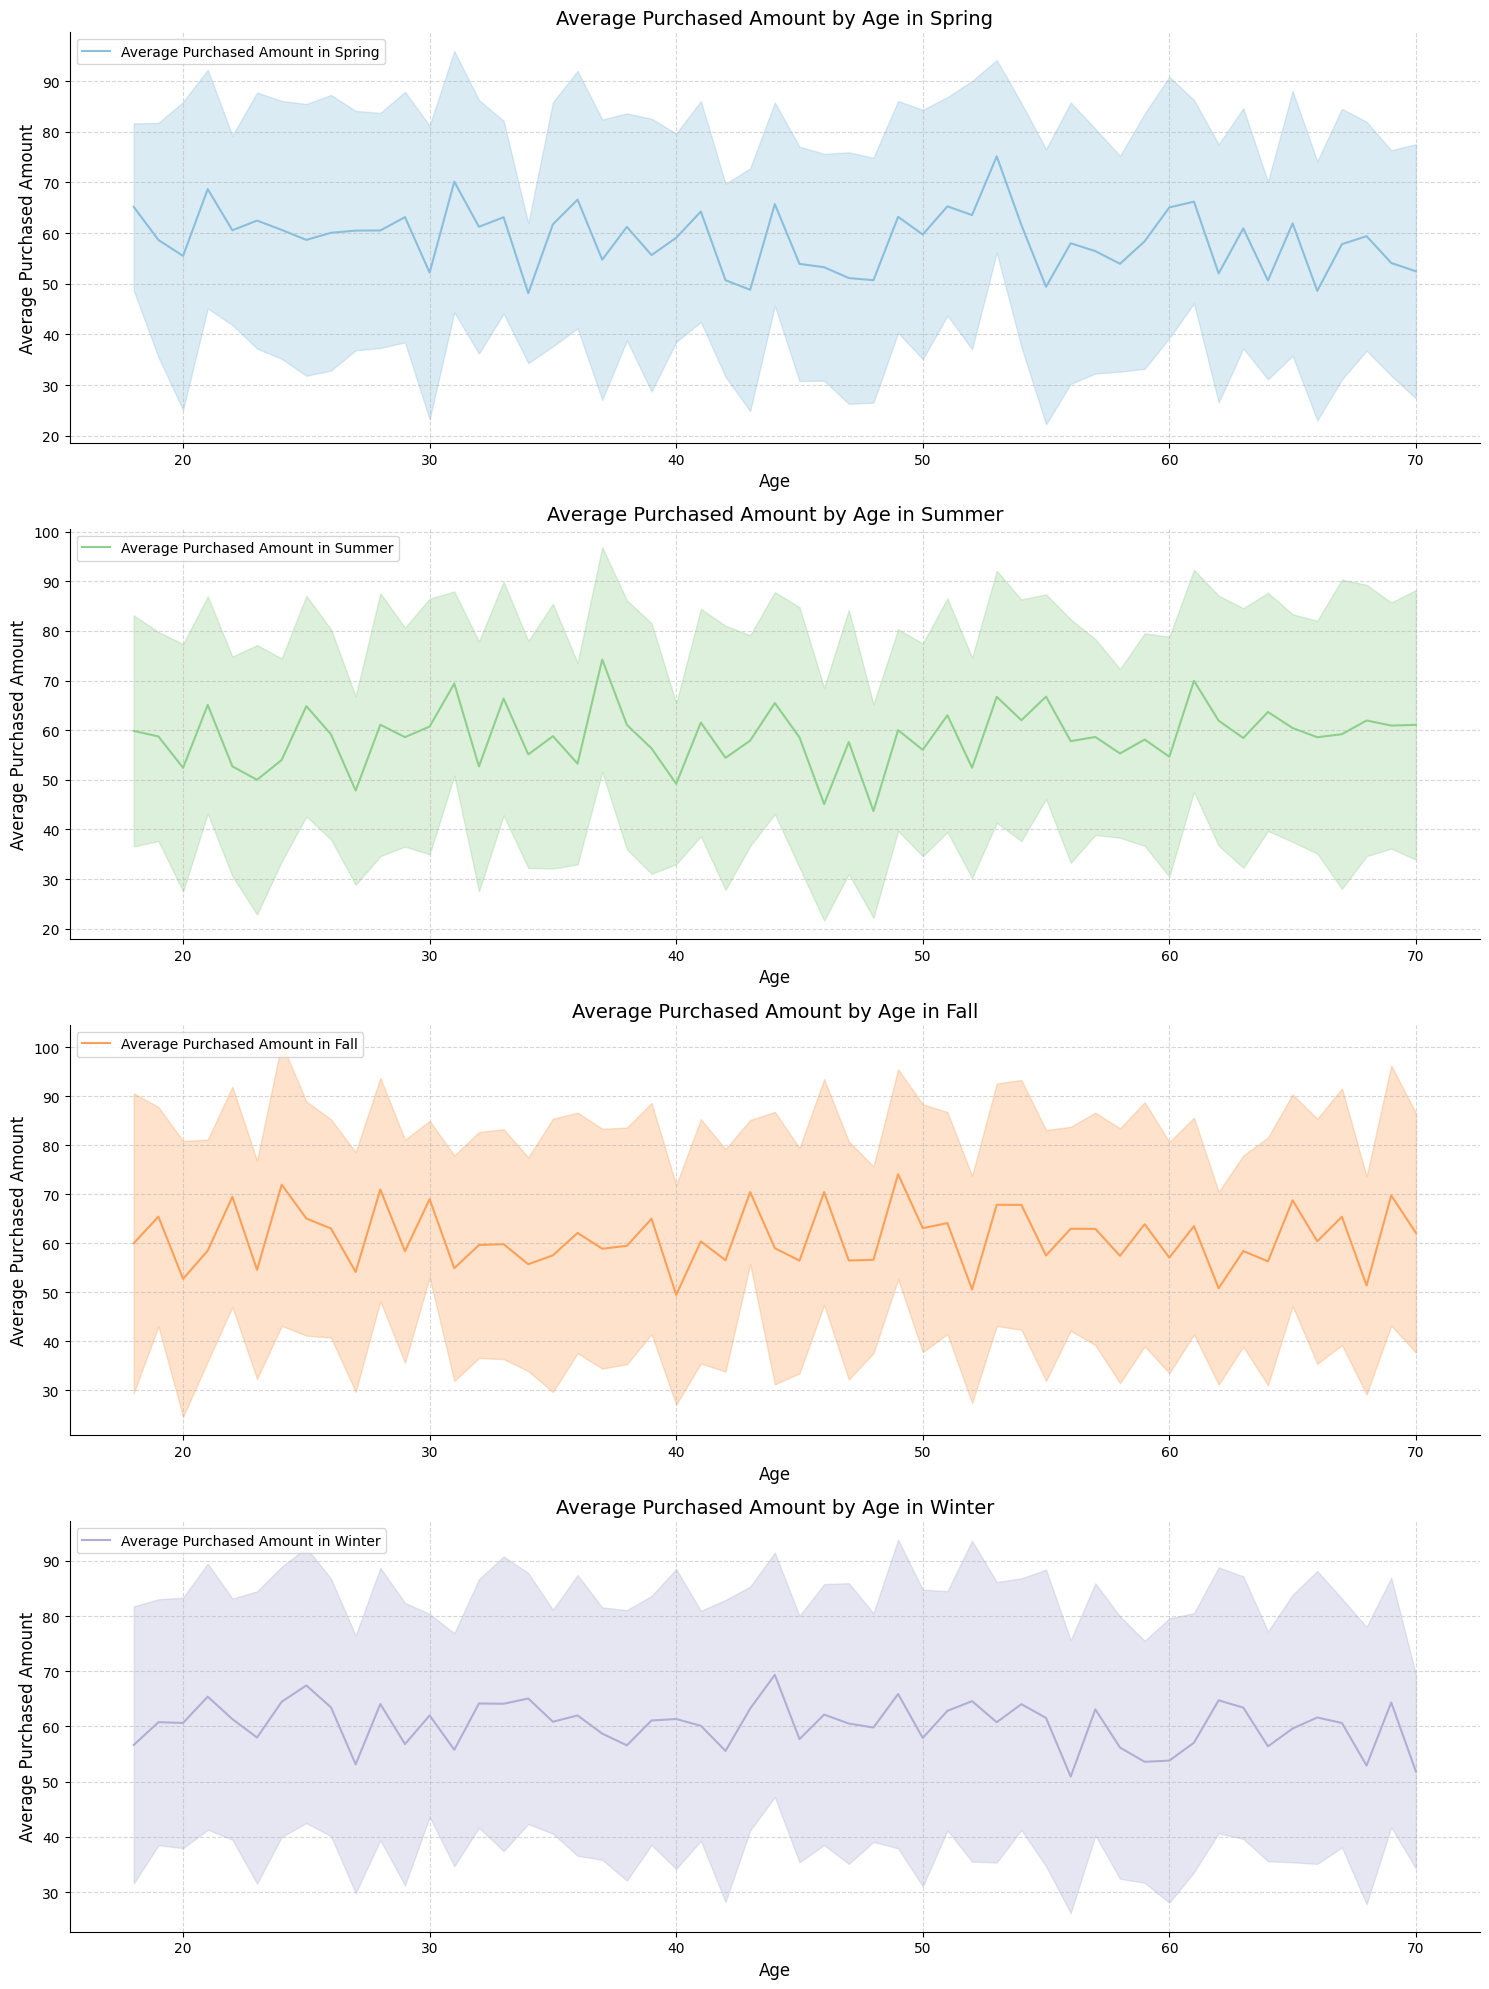

In [44]:
# Python
import matplotlib.pyplot as plt
import seaborn as sns

# Define the seasons
Season = ["Spring", "Summer", "Fall", "Winter"]

# Define color palettes for each season
color_palettes = ["Blues", "Greens", "Oranges", "Purples"]

# Create a figure with subplots for each season
fig, axes = plt.subplots(nrows=len(Season), figsize=(15, 5 * len(Season)))

# Check if we have a single season (and thus axes is not an array)
if len(Season) == 1:
    axes = [axes]

# Loop through each season and create the plots
for i, season in enumerate(Season):
    # Filter the dataset for the given season
    season_df = df[df["Season"] == season]

    # Calculate the average purchased amount by age
    avg_purchased_amount = season_df.groupby("Age")["Purchase Amount (USD)"].mean()

    # Calculate the standard deviation of purchased amount by age
    std_purchased_amount = season_df.groupby("Age")["Purchase Amount (USD)"].std()

    # Create the line plot for average purchased amount by age with error bars
    sns.lineplot(
        x=avg_purchased_amount.index,
        y=avg_purchased_amount.values,
        ax=axes[i],
        label=f"Average Purchased Amount in {season}",
        color=sns.color_palette(color_palettes[i])[2],
    )

    # Add error bars
    axes[i].fill_between(
        avg_purchased_amount.index,
        avg_purchased_amount.values - std_purchased_amount.values,
        avg_purchased_amount.values + std_purchased_amount.values,
        alpha=0.3,
        color=sns.color_palette(color_palettes[i])[2],
    )

    # Add vertical lines on each '0' marker
    for x, y in zip(avg_purchased_amount.index, avg_purchased_amount.values):
        if y == 0:
            axes[i].axvline(x=x, color="red", linestyle="--", alpha=0.5)

    # Set titles and labels
    axes[i].set_title(f"Average Purchased Amount by Age in {season}", fontsize=14)
    axes[i].set_xlabel("Age", fontsize=12)
    axes[i].set_ylabel("Average Purchased Amount", fontsize=12)

    # Add a legend
    axes[i].legend(loc="upper left", fontsize=10)

    # Customize the plot style
    axes[i].grid(True, linestyle="--", alpha=0.5)
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)

    # Set the tick label font size
    axes[i].tick_params(axis="both", which="major", labelsize=10)

    # Set the axis label font size
    axes[i].xaxis.label.set_size(12)
    axes[i].yaxis.label.set_size(12)

# Adjust the layout
plt.tight_layout()
plt.show()

In [48]:
# Python
import plotly.graph_objects as go

# Define the seasons
Season = ["Spring", "Summer", "Fall", "Winter"]

# Create a figure
fig = go.Figure()

# Loop through each season and create the plots
for season in Season:
    # Filter the dataset for the given season
    season_df = df[df["Season"] == season]

    # Calculate the average purchased amount by age
    avg_purchased_amount = season_df.groupby("Age")["Purchase Amount (USD)"].mean()

    # Create the line plot for average purchased amount by age
    fig.add_trace(
        go.Scatter(
            x=avg_purchased_amount.index,
            y=avg_purchased_amount.values,
            mode="lines+markers",
            name=f"Average Purchased Amount in {season}",
        )
    )

# Set titles and labels
fig.update_layout(
    title="Average Purchased Amount by Age in All Seasons",
    xaxis_title="Age",
    yaxis_title="Average Purchased Amount",
)

# Show the plot
fig.show()

In [49]:
# Python
import plotly.graph_objects as go

# Define the genders
Genders = ["Female", "Male"]

# Create a figure
fig = go.Figure()

# Loop through each gender and create the plots
for gender in Genders:
    # Filter the dataset for the given gender
    gender_df = df[df["Gender"] == gender]

    # Calculate the average purchased amount by age
    avg_purchased_amount = gender_df.groupby("Age")["Purchase Amount (USD)"].mean()

    # Create the line plot for average purchased amount by age
    fig.add_trace(
        go.Scatter(
            x=avg_purchased_amount.index,
            y=avg_purchased_amount.values,
            mode="lines+markers",
            name=f"Average Purchased Amount in {gender}",
        )
    )

# Set titles and labels
fig.update_layout(
    title="Average Purchased Amount by Age for Each Gender",
    xaxis_title="Age",
    yaxis_title="Average Purchased Amount",
)

# Show the plot
fig.show()

In [50]:
# Python
import plotly.graph_objects as go

# Define the genders
Genders = ["Female", "Male"]

# Create a figure
fig = go.Figure()

# Loop through each gender and create the plots
for gender in Genders:
    # Filter the dataset for the given gender
    gender_df = df[df["Gender"] == gender]

    # Calculate the average purchased amount by age for all seasons
    avg_purchased_amount = (
        gender_df.groupby(["Season", "Age"])["Purchase Amount (USD)"]
        .mean()
        .reset_index()
    )

    # Loop through each season and create the line plots
    for season in df["Season"].unique():
        season_data = avg_purchased_amount[avg_purchased_amount["Season"] == season]
        fig.add_trace(
            go.Scatter(
                x=season_data["Age"],
                y=season_data["Purchase Amount (USD)"],
                mode="lines+markers",
                name=f"{gender} in {season}",
            )
        )

# Set titles and labels
fig.update_layout(
    title="Average Purchased Amount by Age for Each Gender in All Seasons",
    xaxis_title="Age",
    yaxis_title="Average Purchased Amount",
)

# Show the plot
fig.show()

In [57]:
# Python
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define the genders and seasons
Genders = df["Gender"].unique()
Seasons = df["Season"].unique()

# Create a subplot for each gender
fig = make_subplots(rows=len(Genders), subplot_titles=Genders)

# Loop through each gender and create the plots
for i, gender in enumerate(Genders, start=1):
    # Filter the dataset for the given gender
    gender_df = df[df["Gender"] == gender]

    # Loop through each season and create the scatter plots
    for season in Seasons:
        # Filter the dataset for the given season
        season_df = gender_df[gender_df["Season"] == season]

        # Calculate the average purchased amount by age
        avg_purchased_amount = season_df.groupby("Age")["Purchase Amount (USD)"].mean()

        # Create the scatter plot
        fig.add_trace(
            go.Scatter(
                x=avg_purchased_amount.index,
                y=avg_purchased_amount.values,
                mode="markers",
                name=season,
            ),
            row=i,
            col=1,
        )

# Set titles and labels
fig.update_layout(
    height=800,
    width=800,
    title_text="Average Purchased Amount by Age for Each Gender in All Seasons",
    showlegend=False,
)
fig.update_xaxes(title_text="Age")
fig.update_yaxes(title_text="Average Purchased Amount")

# Set a different color palette
colors = [
    "rgb(31, 119, 180)",
    "rgb(255, 127, 14)",
    "rgb(44, 160, 44)",
    "rgb(214, 39, 40)",
]
for i, trace in enumerate(fig.data):
    trace.marker.color = colors[i % len(colors)]

# Show the plot
fig.show()

/var/folders/jw/4t4swxld5c5f_5xhv0_bzbr00000gn/T/ipykernel_29322/3161377614.py:34: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/jw/4t4swxld5c5f_5xhv0_bzbr00000gn/T/ipykernel_29322/3161377614.py:34: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/jw/4t4swxld5c5f_5xhv0_bzbr00000gn/T/ipykernel_29322/3161377614.py:34: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/jw/4t4swxld5c5f_5xhv0_bzbr00000gn/T/ipykernel_29322/3161377614.py:34: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



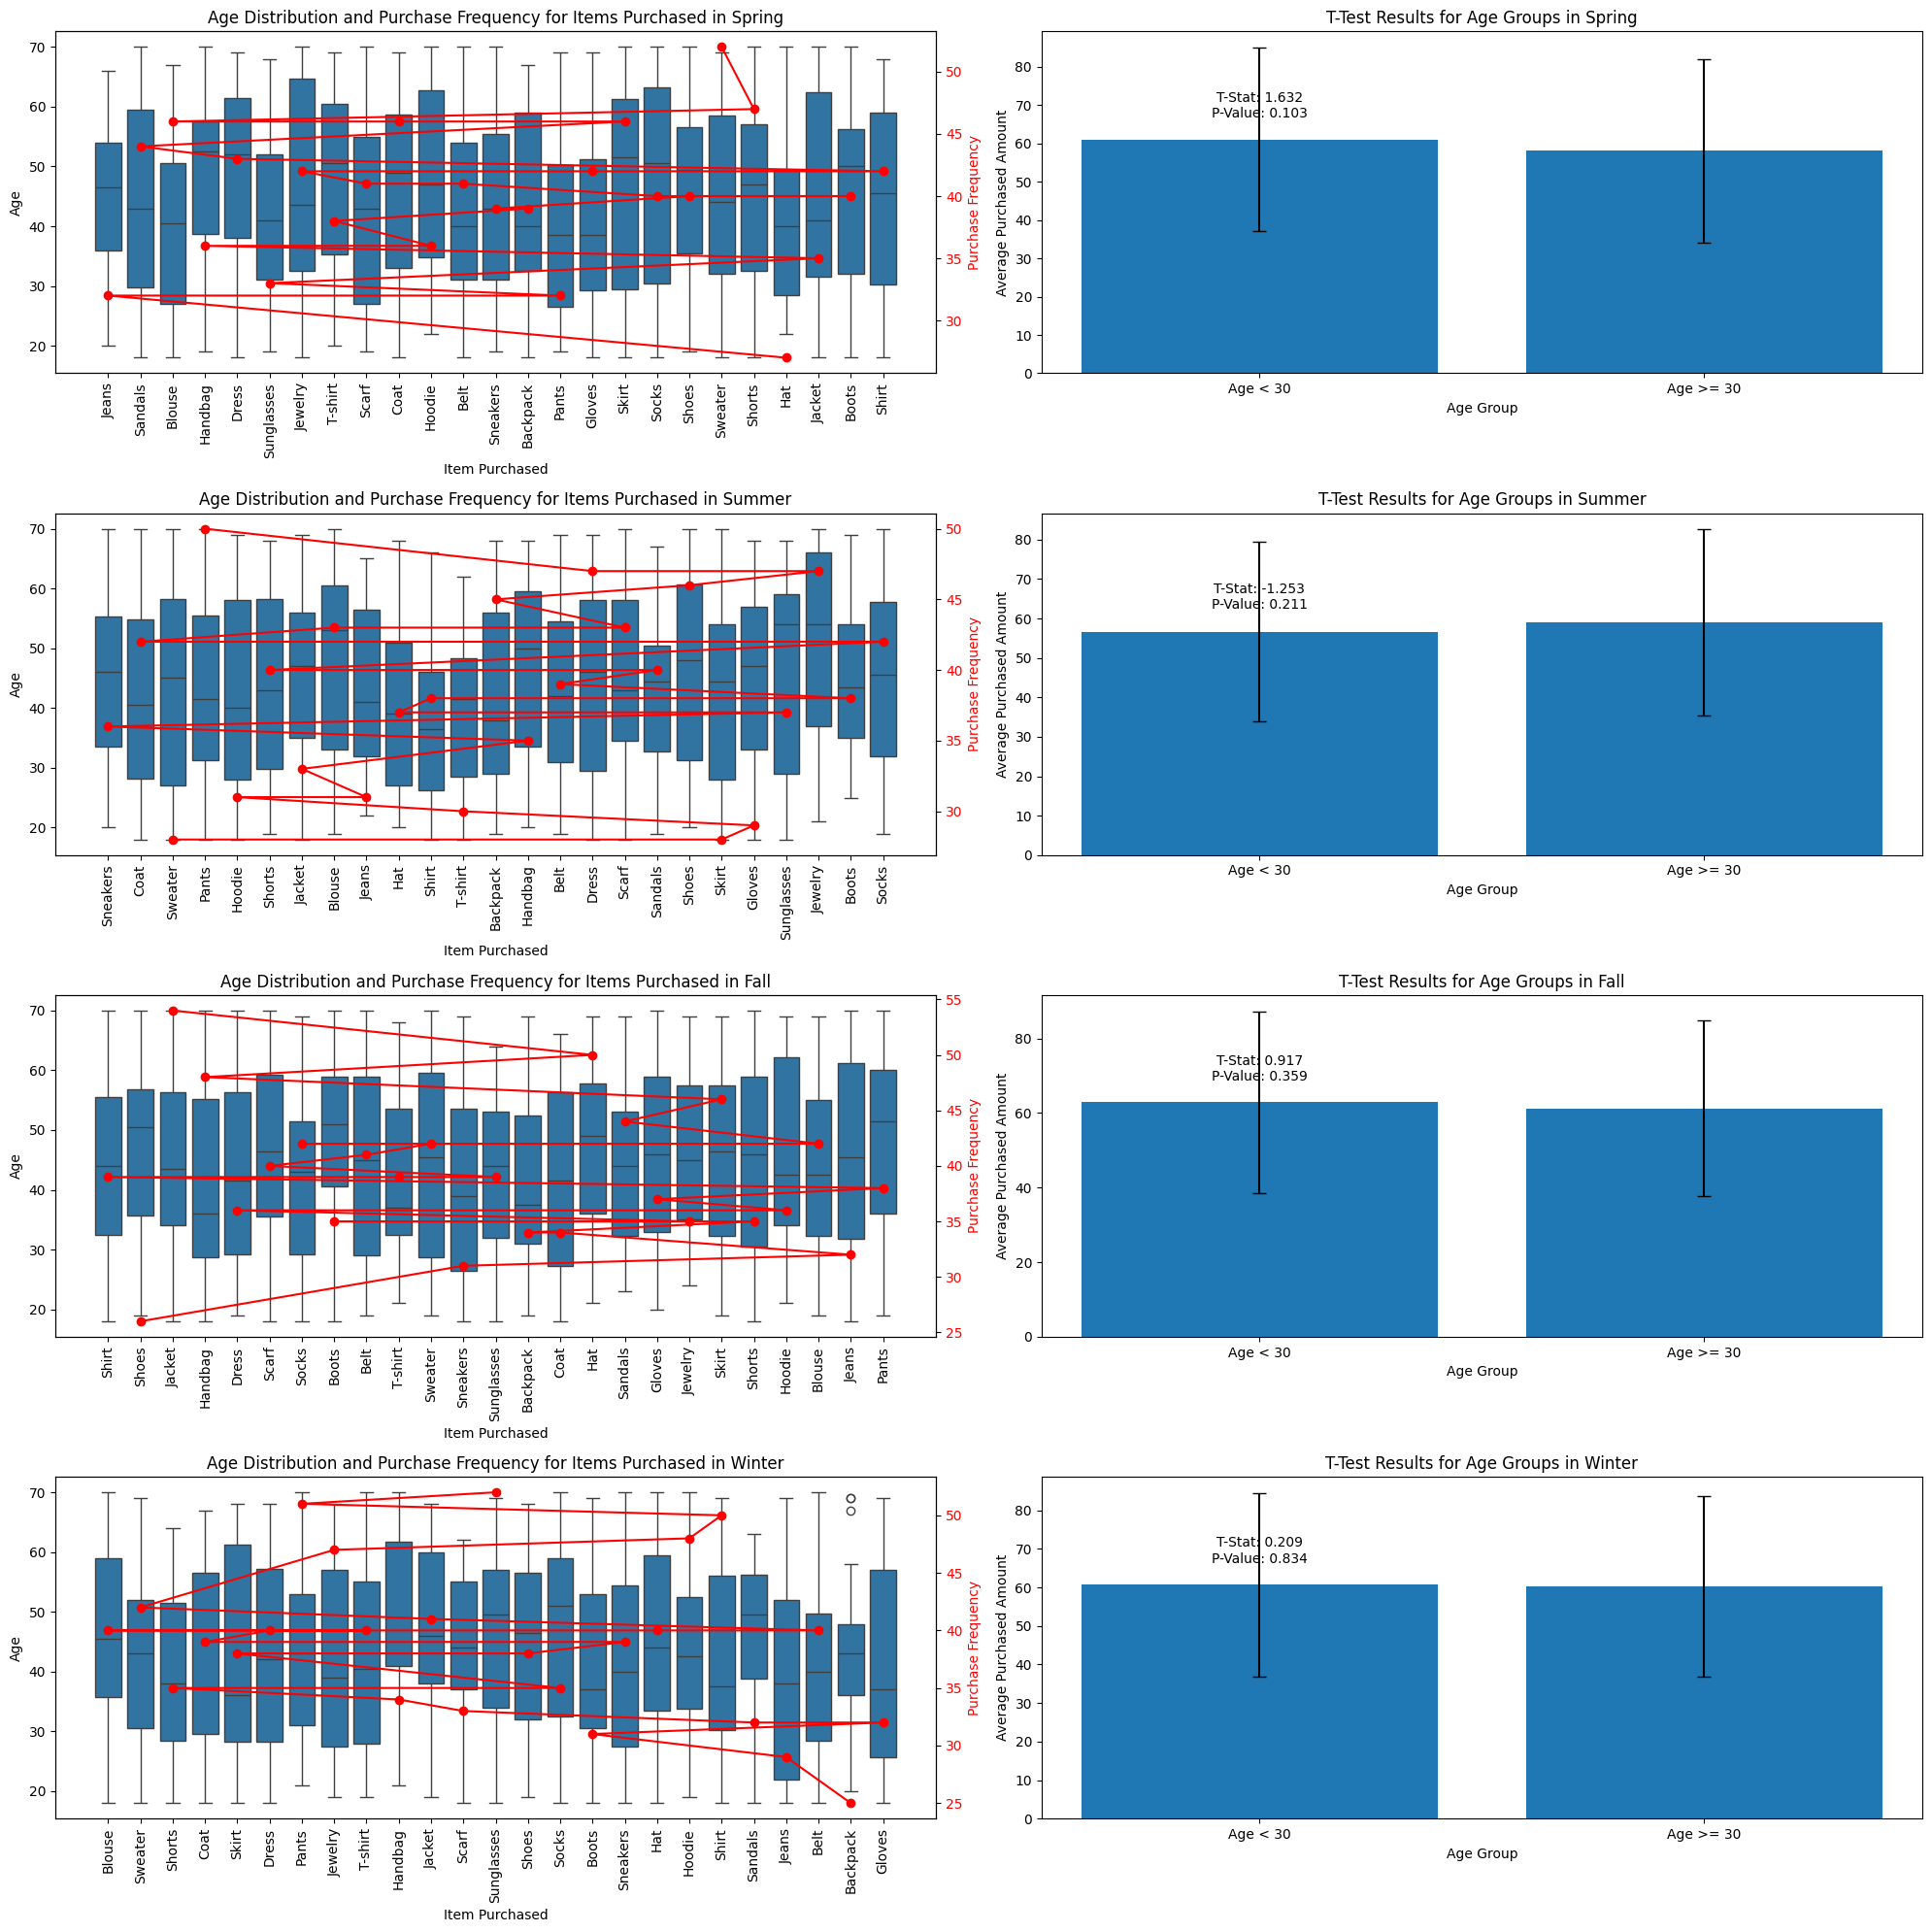

In [41]:
# Python
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Define the seasons
Season = ["Spring", "Summer", "Fall", "Winter"]

# Create a figure with subplots for each season
fig, axes = plt.subplots(nrows=len(Season), ncols=2, figsize=(20, 5 * len(Season)))

# Check if we have a single season (and thus axes is not an array)
if len(Season) == 1:
    axes = [axes]

# Loop through each season and create the plots
for i, season in enumerate(Season):
    # Filter the dataset for the given season
    season_df = df[df["Season"] == season]

    # Create the boxplot for age distribution by item purchased
    sns.boxplot(data=season_df, x="Item Purchased", y="Age", ax=axes[i, 0])

    # Calculate the purchase frequency by item purchased and sort it
    purchase_frequency = (
        season_df["Item Purchased"].value_counts().sort_values(ascending=False)
    )

    # Create a twin axis for the line plot for purchase frequency
    ax2 = axes[i, 0].twinx()
    ax2.plot(
        purchase_frequency.index,
        purchase_frequency.values,
        label=f"Purchase Frequency in {season}",
        color="red",
        marker="o",
    )

    # Set titles and labels
    axes[i, 0].set_title(
        f"Age Distribution and Purchase Frequency for Items Purchased in {season}"
    )
    axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=90)
    axes[i, 0].set_xlabel("Item Purchased")
    axes[i, 0].set_ylabel("Age")
    ax2.set_ylabel("Purchase Frequency", color="red")

    # Set the y-axis label color to match the line plots
    for label in ax2.get_yticklabels():
        label.set_color("red")

    # Perform statistical analysis - t-test
    age_group_1 = season_df[season_df["Age"] < 30]["Purchase Amount (USD)"]
    age_group_2 = season_df[season_df["Age"] >= 30]["Purchase Amount (USD)"]
    t_stat, p_value = np.round(stats.ttest_ind(age_group_1, age_group_2), 3)

    # Create a bar plot to visualize the t-test results
    axes[i, 1].bar(
        ["Age < 30", "Age >= 30"],
        [np.mean(age_group_1), np.mean(age_group_2)],
        yerr=[np.std(age_group_1), np.std(age_group_2)],
        capsize=5,
    )
    axes[i, 1].set_title(f"T-Test Results for Age Groups in {season}")
    axes[i, 1].set_xlabel("Age Group")
    axes[i, 1].set_ylabel("Average Purchased Amount")
    axes[i, 1].text(
        0,
        np.mean(age_group_1) + 5,
        f"T-Stat: {t_stat}\nP-Value: {p_value}",
        ha="center",
        va="bottom",
    )

# Adjust the layout
plt.tight_layout()
plt.show()